<a href="https://colab.research.google.com/github/Michelhsn/SeriesTemporais/blob/master/Covid19_Brazil_Infection_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quando acaba, Nuts?

A abordagem adotada é usar os dados reais provenientes da pandemia do Covid-19, conforme relatado pelas organizações de saúde, e encontrar os parâmetros certos que aproximam os dados com uma [função logística](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_log%C3%ADstica).

Esse modelo é uma estimativa que melhora a medida que aumenta o número de dados de entrada, por isso, as previsões possuem uma incerteza muito grande no início da pandemia.

À medida que o número dos dados de entrada aumentam, as curvas da função logística calculadas para o dia de hoje, de ontem e de dois dias atrás tendem a convergir. Para modelos mais complexos e mais precisos, incorpora-se ao modelo o comportamento das infecções que estão no fim e com mais dados, como na China e na Coréia do Sul (14/mar/2020).

ESSE NÃO É O CASO DESSE MODELO!

O modelo atual utiliza os dados provenientes do Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), mas pode-se editar esse código para fazer a estimativa utilizando dados provenientes do ECDC(https://www.ecdc.europa.eu/en) ou da OMS(https://www.who.int/).

14/mar/2020: Os dados de entrada do modelo estão muito no início da infecção para serem corretamente modelados. Com o passar dos dias, o modelo ficará melhor ajustado.

In [0]:
#@title { vertical-output: true, display-mode: "form" }
import pandas as pd
from datetime import datetime, timedelta

#País de origem
country = 'Brazil'
#country = 'US'
#country = 'China'
#country = 'South Korea'
#country = 'Spain'
#country = 'France'
#country = 'Iran'

# read the latest CSV file

#Fonte de Dados: Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)
df = df.loc[df['Country/Region'] == country]
df = df.groupby(['Country/Region']).sum()
df = df.T
df = df[4:]
df.index = df.index.set_names('day')
df.columns = ['cases']
df = df.reset_index()
first_day = datetime(2020, 1, 1) - timedelta(days=1)
df['day'] = df['day'].map(lambda x: (datetime.strptime(x, '%m/%d/%y') - first_day).days)

#Fonte de Dados: ECDC
#url  = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls"#.format(month, day)
#df = pd.read_excel(url)
#df = df.loc[df['Countries and territories'] == country]
#df = df.sort_values(by=['DateRep'])
#df = df.reset_index()
#df = df.rename(columns={"DateRep": 'day', "Cases": 'cases'})
#df = df.loc[:, ['day', 'cases']]
#first_day = datetime(2020, 1, 1) - timedelta(days=1)
#df['day'] = df['day'].map(lambda x: (x - first_day).days)

#Fonte de Dados: WHO para o Brasil
#url = "https://raw.githubusercontent.com/deamorim2/covid19/master/covid19-bra-andamento-nacional.csv"
#df = pd.read_csv(url)
#df = df.rename(columns={"data": 'day', "casos": 'cases'})
#df = df.loc[:, ['day', 'cases']]
#first_day = datetime(2020, 1, 1) - timedelta(days=1)
#df['day'] = df['day'].map(lambda x: (datetime.strptime(x, '%Y-%m-%d') - first_day).days)

#The following block is just for displaying the input data, with some unused augmentation
df = df.copy()
#ECDC# df['cases'] = df.cumsum()['cases'].fillna(0)
df['cases_diff'] = df.diff()['cases'].fillna(0)
df['date'] = [first_day + timedelta(days = day) for day in df['day']]
df = df.loc[df['cases'] != 0]
df

,day,cases,cases_diff,date
33,57,1.0,1.0,2020-02-26
34,58,1.0,0.0,2020-02-27
35,59,1.0,0.0,2020-02-28
36,60,2.0,1.0,2020-02-29
37,61,2.0,0.0,2020-03-01
38,62,2.0,0.0,2020-03-02
39,63,2.0,0.0,2020-03-03
40,64,4.0,2.0,2020-03-04
41,65,4.0,0.0,2020-03-05
42,66,13.0,9.0,2020-03-06


## Infecção Diária Confirmada da População Brasileira(Covid-19)

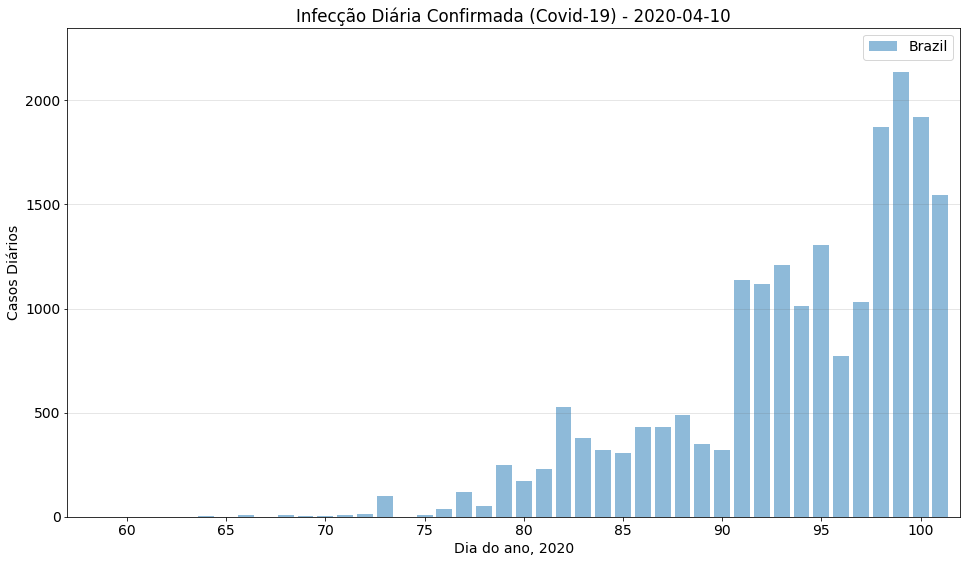

In [0]:
#@title { vertical-output: true, display-mode: "form" }
x = df['day'].tolist()
y = df['cases_diff'].tolist()
last = int(df['day'].iloc[-1])

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.figure(figsize=(16, 9))
plt_axes = plt.gca()
plt_axes.grid(axis='y', color=(0.4, 0.4, 0.4), alpha=0.2)
plt.bar(x, y, align='center', alpha=0.5, label=country, linewidth=3)
plt.xlim(int(min(x)), int(max(x) + 1))
plt.ylim(0, int(max(y))*1.1)
plt.title("Infecção Diária Confirmada (Covid-19) - "+str((first_day + timedelta(last)).date()))
plt.xlabel("Dia do ano, 2020")
plt.ylabel("Casos Diários")
plt.legend()
plt.show()

## Previsão do tamanho da infecção
Usamos um modelo logístico e o ajustamos aos dados. O modelo logístico será diferente da realidade, mas é um modelo fácil e explicável que pode ser usado no momento para modelar a lenta propagação do vírus em uma população.

In [0]:
#@title { vertical-output: true, display-mode: "form" }
import numpy as np
from scipy.optimize import curve_fit, fsolve
from IPython.display import HTML as html_print


def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))


# fit the data to the model (find the model variables that best approximate)
def predict_logistic_maximum(df):
    samples = df.shape[0]
    x_days = df['day'].tolist()
    y_cases = df['cases'].tolist()
    initial_guess = 4, 100, 25000 # speed, peak, amplitude

    fit = curve_fit(logistic_model, x_days, y_cases, p0=initial_guess, maxfev=9999)

    # parse the result of the fit
    speed, x_peak, y_max = fit[0]
    speed_error, x_peak_error, y_max_error = [np.sqrt(fit[1][i][i]) for i in [0, 1, 2]]

    # find the "end date", as the x (day of year) where the function reaches 99.99%
    end = int(fsolve(lambda x: logistic_model(x, speed, x_peak, y_max) - y_max * 0.9999, x_peak))

    return x_days, y_cases, speed, x_peak, y_max, x_peak_error, y_max_error, end, samples

# print results
def print_prediction(df, label):
    x, y, speed, x_peak, y_max, x_peak_error, y_max_error, end, samples = predict_logistic_maximum(df)
    print("Previsão de " + label +
          " Máximo de casos: " + str(int(round(y_max))) +
          " (± " + str(int(round(y_max_error))) + ")" +
          ", pico da infecção no dia: " + str(int(round(x_peak))) +"("+str((first_day + timedelta(x_peak)).date())+")"+
          " (± " + str(round(x_peak_error, 2)) + ")" +
          ", final da infecção no dia: " + str(end)+"("+str((first_day + timedelta(end)).date())+")")
    return y_max

print_prediction(df[:-2], "2 dias atrás -")
print_prediction(df[:-1], "ontem - ")
pred = print_prediction(df, "hoje - ")
print()
html_print("Para o dia de hoje, o total da infecção deverá se estabilizar em <b>" + str(int(round(pred))) + " </b> casos.")

Previsão de 2 dias atrás - Máximo de casos: 34291 (± 3899), pico da infecção no dia: 100(2020-04-08) (± 1.14), final da infecção no dia: 152(2020-05-31)
Previsão de ontem -  Máximo de casos: 42085 (± 5089), pico da infecção no dia: 102(2020-04-10) (± 1.23), final da infecção no dia: 156(2020-06-04)
Previsão de hoje -  Máximo de casos: 43428 (± 4175), pico da infecção no dia: 102(2020-04-11) (± 1.01), final da infecção no dia: 157(2020-06-05)



## Live Predictions and Experiments

### Plot 1. data & projections, for today and the former 2 days

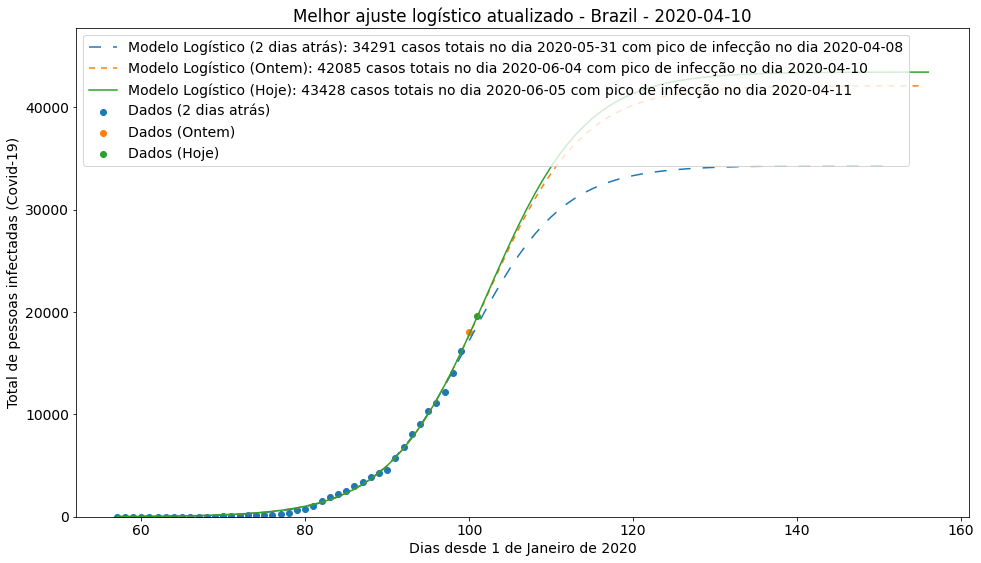

In [0]:
#@title { vertical-output: true, display-mode: "form" }
import matplotlib.pyplot as plt
plt.rc('font', size=14)


def add_real_data(df, label, color=None):
    x = df['day'].tolist()
    y = df['cases'].tolist()
    plt.scatter(x, y, label="Dados (" + label + ")", c=color)


def add_logistic_curve(df, label, **kwargs):
    x, _, speed, x_peak, y_max, _, _, end, _ = predict_logistic_maximum(df)
    x_range = list(range(min(x), end))
    plt.plot(x_range,
             [logistic_model(i, speed, x_peak, y_max) for i in x_range],
             label="Modelo Logístico (" + label + "): " + str(int(round(y_max)))+" casos totais no dia "+str((first_day + timedelta(end)).date())+" com pico de infecção no dia "+str((first_day + timedelta(x_peak)).date())  ,
             **kwargs)
    return y_max

def label_and_show_plot(plt, title, y_max=None):
    plt.title(title)
    plt.xlabel("Dias desde 1 de Janeiro de 2020")
    plt.ylabel("Total de pessoas infectadas (Covid-19)")
    if (y_max):
        plt.ylim(0, y_max * 1.1)
    plt.legend(loc='upper left')
    plt.show()

last = int(df['day'].iloc[-1])

# Plot
plt.figure(figsize=(16, 9))
add_real_data(df[:-2], "2 dias atrás")
add_real_data(df[-2:-1], "Ontem")
add_real_data(df[-1:], "Hoje")
#y_max = add_logistic_curve(df[:-2], "2 days ago", dashes=[8, 8])
y_2_days_ago = add_logistic_curve(df[:-2], "2 dias atrás", dashes=[8, 8])
y_yesterday = add_logistic_curve(df[:-1], "Ontem", dashes=[4, 4])
y_today = add_logistic_curve(df, "Hoje")
y_max = max(y_today, y_yesterday, y_2_days_ago)
label_and_show_plot(plt, "Melhor ajuste logístico atualizado - "+country+ " - "+str((first_day + timedelta(last)).date()), y_max)

# Live analysis of the growth for the World COVID19 pandemic

**Source:**

Source code adapted from Enrico Ros Malato available on his Google Colab Research: 
https://colab.research.google.com/drive/16CzLtNCnYq8x3gEBOgg2pMmDQngSD2vG#scrollTo=Jd6vKPXeEymQ

Source code from Gianluca Malato available on his [Medium Post](https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d). Gianluca's story goes in depth and is an incredible starting point for this, please click on the link and take a look at the story.

The approach that he takes is to use the real data coming from the pandemic, as reported by the Countries government, and find the right parameters that approximate the data with a [logistic function](https://en.wikipedia.org/wiki/Logistic_function). In the charts you can see the data is fitting for now the lower part of the logistic function, which is the exponential part.

## Import the latest data
The data comes from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv, That is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).